# Exam set 
## date : 19/01 - 2023


### Import of libraries and external functions

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from iminuit import Minuit
from scipy import stats
import math 
import sympy as sp
from IPython.core.display import Latex
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import sys

In [165]:
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import  nice_string_output, add_text_to_ax 

In [166]:
sys.path.append('My_Functions')
from My_Functions import *
plot_pref()
r = np.random
r.seed(16)

## Problem 4

In [167]:
dataframe = pd.read_csv('data_AnorocDisease.csv', header=0)
PatientID, Temp, BloodP, Age, Status = dataframe.values.T
health = Status == 0
sick = Status == 1
unknown = Status == -1


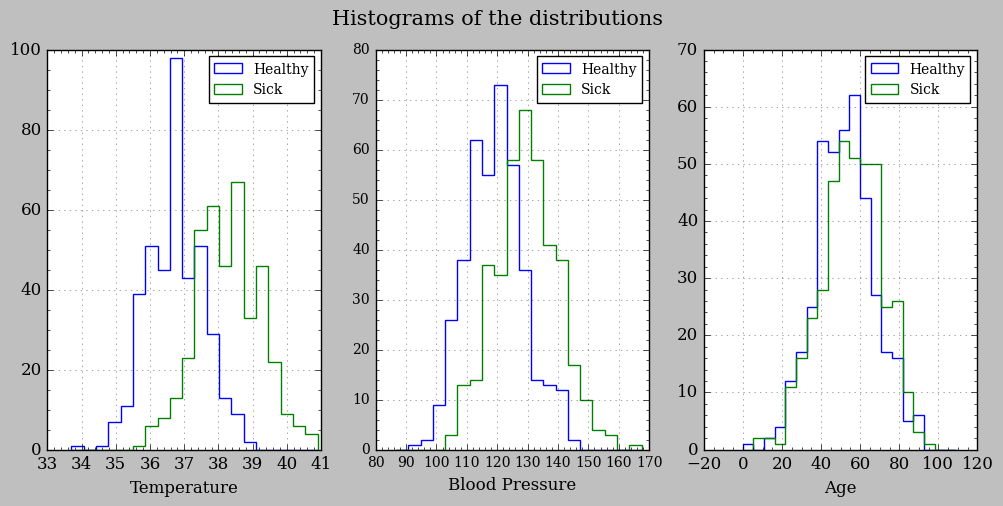

In [168]:
#we plot each distribution for healthy and sick
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

Temp_bins = np.linspace(np.min(Temp), np.max(Temp), 21)
ax[0].hist(Temp[health], bins=Temp_bins, histtype='step', label='Healthy')
ax[0].hist(Temp[sick], bins=Temp_bins, histtype='step', label='Sick')
ax[0].set_xlabel('Temperature')
ax[0].legend(fontsize = 10)

BloodP_bins = np.linspace(np.min(BloodP), np.max(BloodP), 21)
ax[1].hist(BloodP[health], bins=BloodP_bins, histtype='step', label='Healthy')
ax[1].hist(BloodP[sick], bins=BloodP_bins, histtype='step', label='Sick')
ax[1].set_xlabel('Blood Pressure')
ax[1].tick_params(labelsize = 10)
ax[1].legend(fontsize = 10)

Age_bins = np.linspace(np.min(Age), np.max(Age), 21)
ax[2].hist(Age[health], bins=Age_bins, histtype='step', label='Healthy')
ax[2].hist(Age[sick], bins=Age_bins, histtype='step', label='Sick')
ax[2].set_xlabel('Age')
ax[2].legend(fontsize = 10)

fig.suptitle('Histograms of the distributions', fontsize = 15)
fig.savefig('figures/411dist.png')

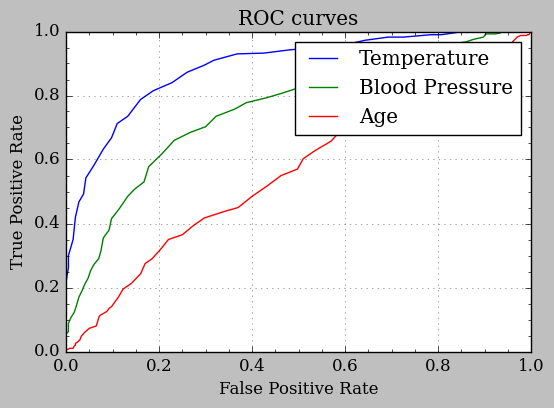

In [169]:
#We check which gives the highest separation using ROC curve
ROC_Temp = ROC_curve(Temp[sick], Temp[health], np.linspace(np.max(Temp), np.min(Temp),  100), above = True)
ROC_BloodP = ROC_curve(BloodP[sick], BloodP[health], np.linspace(np.max(BloodP), np.min(BloodP), 100), above = True)
ROC_Age = ROC_curve(Age[sick], Age[health], np.linspace(np.max(Age), np.min(Age), 100), above = True)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(ROC_Temp[1], ROC_Temp[0], label='Temperature')
ax.plot(ROC_BloodP[1], ROC_BloodP[0], label='Blood Pressure')
ax.plot(ROC_Age[1], ROC_Age[0], label='Age')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
ax.set_title('ROC curves')
fig.savefig('figures/411ROC.png')

In [170]:
#4.1.2
#We check whether the age distribution is the same for age
#We do this by using the Kolmogorov-Smirnov test

ks_result = stats.ks_2samp(Age[health], Age[sick])

print('The p-value for the Kolmogorov-Smirnov test is', ks_result[1])
print(ks_result)

#We also check for their mean and uncertainty
mean_Age_health, err_Age_healtg = np.mean(Age[health]), np.std(Age[health])/np.sqrt(len(Age[health]))
mean_Age_sick, err_Age_sick = np.mean(Age[sick]), np.std(Age[sick])/np.sqrt(len(Age[sick]))

print('The mean age for healthy people is', mean_Age_health, '+/-', err_Age_healtg)
print('The mean age for sick people is', mean_Age_sick, '+/-', err_Age_sick)

z = (mean_Age_sick - mean_Age_health)/np.sqrt(err_Age_healtg**2 + err_Age_sick**2)
p = 2*stats.norm.sf(np.abs(z))
print('with a z-score of', z, 'and a p-value of', p)

The p-value for the Kolmogorov-Smirnov test is 0.0017621899205092087
KstestResult(statistic=0.1325, pvalue=0.0017621899205092087)
The mean age for healthy people is 52.28375 +/- 0.7455408455234026
The mean age for sick people is 55.59524999999999 +/- 0.7746965574299075
with a z-score of 3.079984205295218 and a p-value of 0.0020701157279184425


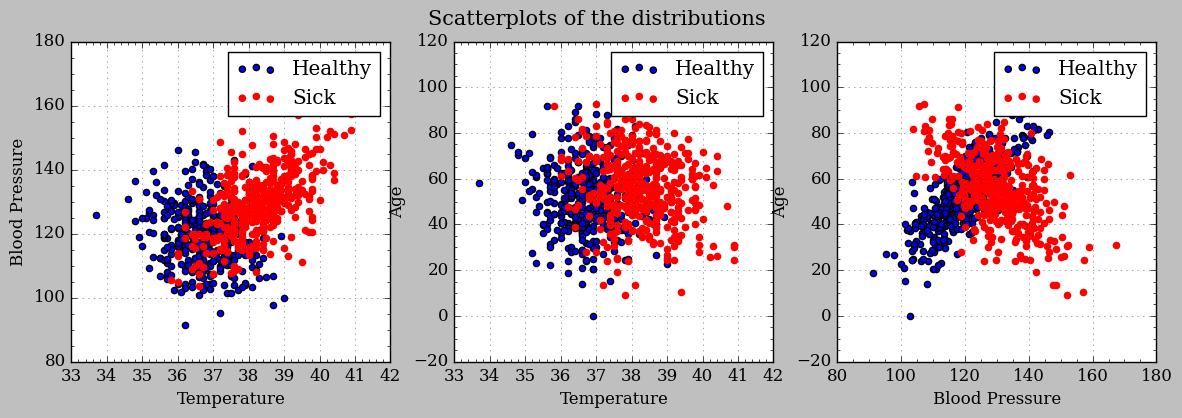

In [171]:
#plot scatterplot for each distribution
fig, ax = plt.subplots(1, 3, figsize=(14,4))

ax[0].scatter(Temp[health], BloodP[health], label='Healthy')
ax[0].scatter(Temp[sick], BloodP[sick], label='Sick', color='red')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Blood Pressure')
ax[0].legend()

ax[1].scatter(Temp[health], Age[health], label='Healthy')
ax[1].scatter(Temp[sick], Age[sick], label='Sick', color='red')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Age')
ax[1].legend()

ax[2].scatter(BloodP[health], Age[health], label='Healthy')
ax[2].scatter(BloodP[sick], Age[sick], label='Sick', color='red')
ax[2].set_xlabel('Blood Pressure')
ax[2].set_ylabel('Age')
ax[2].legend()

fig.suptitle('Scatterplots of the distributions', fontsize = 15)
fig.savefig('figures/412scatter.png')

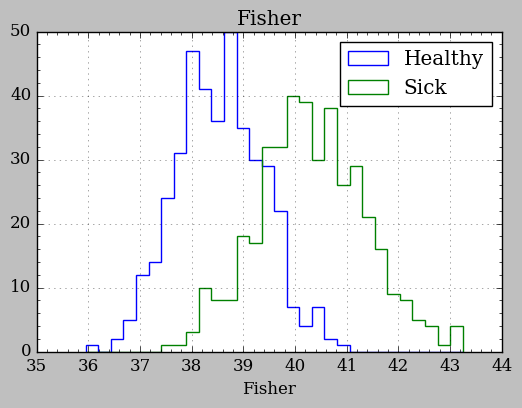

In [172]:
#4.1.3
#We seperate the two groups using fisher

w, fisher_sick, fisher_health = fisher_with_params(np.array([Temp[sick], BloodP[sick], Age[sick]]).T, np.array([Temp[health], BloodP[health], Age[health]]).T)
fisher_sick *= -1
fisher_health *= -1
w *= -1

fisher_bins = np.linspace(np.min(fisher_health), np.max(fisher_sick), 31)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(fisher_health, bins=fisher_bins, histtype='step', label='Healthy')
ax.hist(fisher_sick, bins=fisher_bins, histtype='step', label='Sick')
ax.set_xlabel('Fisher')
ax.legend()
ax.set_title('Fisher')
fig.savefig('figures/413fisher.png')

The threshold for the Fisher discriminant is 39.28485643783349
The true positive rate is 0.85
The false positive rate is 0.2


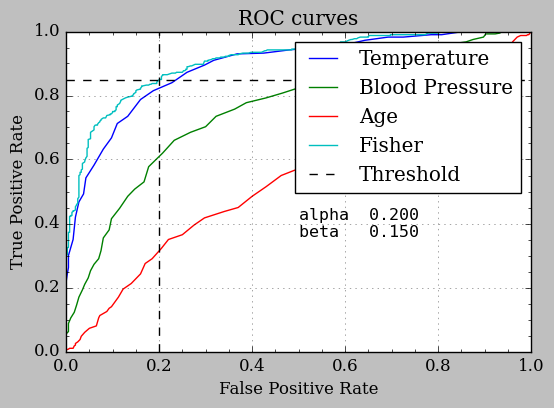

In [173]:
#Add ROC curve 
fisher_axis = np.linspace( np.max(fisher_sick), np.min(fisher_health), 1000)
ROC_fisher = ROC_curve(fisher_sick, fisher_health, fisher_axis, above = True)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(ROC_Temp[1], ROC_Temp[0], label='Temperature')
ax.plot(ROC_BloodP[1], ROC_BloodP[0], label='Blood Pressure')
ax.plot(ROC_Age[1], ROC_Age[0], label='Age')

ax.plot(ROC_fisher[1], ROC_fisher[0], label='Fisher')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

#We choose a threshold where the true positive rate is 0.85
threshold_i = np.where(ROC_fisher[0] >= 0.85)[0][0]
threshold = fisher_axis[threshold_i]
print('The threshold for the Fisher discriminant is', threshold)
print('The true positive rate is', ROC_fisher[0][threshold_i])
print('The false positive rate is', ROC_fisher[1][threshold_i])

d = {
    'alpha': ROC_fisher[1][threshold_i],
    'beta': (1-ROC_fisher[0][threshold_i]),
}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.5, 0.45, text, ax, fontsize=12)

ax.axvline(ROC_fisher[1][threshold_i], color='black', linestyle='--')
ax.axhline(ROC_fisher[0][threshold_i], color='black', linestyle='--', label='Threshold')
ax.legend()
ax.set_title('ROC curves')
fig.savefig('figures/413ROC.png')

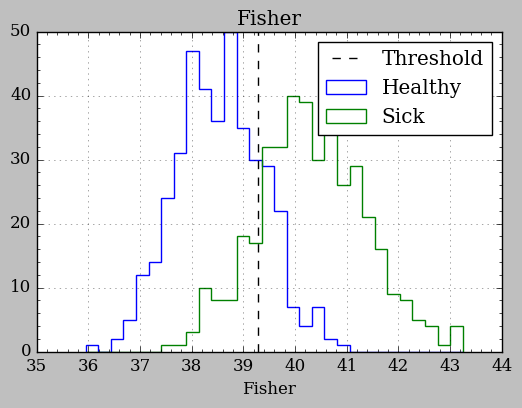

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(fisher_health, bins=fisher_bins, histtype='step', label='Healthy')
ax.hist(fisher_sick, bins=fisher_bins, histtype='step', label='Sick')
ax.axvline(threshold , color='black', linestyle='--', label='Threshold')
ax.set_xlabel('Fisher')
ax.legend()
ax.set_title('Fisher')
fig.savefig('figures/413fisher_threshold.png')


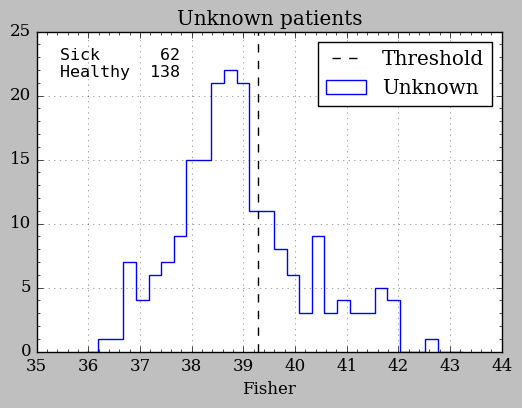

In [175]:
#4.1.4
#We try to seperate the two groups in the unknown data using the fischer
fisher_unknown = w @ np.array([Temp[unknown], BloodP[unknown], Age[unknown]])

#We plot the histogram
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(fisher_unknown, bins=fisher_bins, histtype='step', label='Unknown')
ax.axvline(threshold, color ='black', linestyle = '--', label='Threshold')
ax.set_xlabel('Fisher')
ax.legend()
ax.set_title('Unknown patients')
d = {
    'Sick': np.sum(fisher_unknown > threshold),
    'Healthy': np.sum(fisher_unknown < threshold),
}
text = nice_string_output(d, extra_spacing=2, decimals=0)
add_text_to_ax(0.05, 0.95, text, ax, fontsize=12)


fig.savefig('figures/414fisher_unknown.png')

In [176]:
#Using the cutoff
sick_unknown = fisher_unknown >= threshold
healthy_unknown = fisher_unknown < threshold

print('The number of sick people in the unknown data is', np.sum(sick_unknown))
print('The number of healthy people in the unknown data is', np.sum(healthy_unknown))


The number of sick people in the unknown data is 62
The number of healthy people in the unknown data is 138


In [177]:
#4.1.4 
#A temperature of 38.6 is observed what is the probablility that the person is sick
T_obs = 38.6
prior = 0.01

#We calculate the likelihood assuming both distributions are gaussian
likelihood = stats.norm.sf(np.abs(T_obs - np.mean(Temp[sick])), loc = 0, scale=np.std(Temp[sick]))
print('The likelihood that the person is sick is', likelihood)
#Marginal likelihood
M_likelihood = likelihood*prior + (1-prior)*stats.norm.sf(T_obs, loc=np.mean(Temp[health]), scale=np.std(Temp[health]))
print('the marginal likelihood is', M_likelihood)

#Posterior
posterior = likelihood*prior/M_likelihood
print('The posterior probability that the person is sick is', posterior)



The likelihood that the person is sick is 0.3667772620496434
the marginal likelihood is 0.014782993170061093
The posterior probability that the person is sick is 0.24810757728850905


In [178]:
#Alternative method for Bayes
likelihood_2 = np.sum(Temp[sick] > T_obs)/len(Temp[sick])
print('The likelihood that the person is sick is', likelihood_2)
#Marginal likelihood
M_likelihood_2 = likelihood_2*prior + (1-prior)*np.sum(Temp[health] > T_obs)/len(Temp[health])
print('the marginal likelihood is', M_likelihood_2)

#Posterior
posterior_2 = likelihood_2*prior/M_likelihood_2
print('The posterior probability that the person is sick is', posterior_2)

The likelihood that the person is sick is 0.35
the marginal likelihood is 0.018349999999999998
The posterior probability that the person is sick is 0.19073569482288827


In [179]:
#4.2

dataframe = pd.read_csv('data_CountryScores.csv', header=1, index_col=None)
Country, GDP, PopSize, HappinessI, EconomicFreedomI, PressFreedomI, EducationI = dataframe.values.T


In [180]:
#4.2.1
#The mean of the GDP
mean_GDP = np.mean(GDP)
print('The mean of the GDP is', mean_GDP, '+/-', np.std(GDP)/np.sqrt(len(GDP)))

#Median of the GDP
median_GDP = np.median(GDP)
print('The median of the GDP is', median_GDP)
print('Seems skewed')

# 25% and 75% quantiles
q25, q75 = np.quantile(GDP, [0.25, 0.75])
print('The 25% quantile is', q25)
print('The 75% quantile is', q75)

The mean of the GDP is 17489.090909090908 +/- 2071.1051725135353
The median of the GDP is 6769.0
Seems skewed
The 25% quantile is 2098.75
The 75% quantile is 23935.75


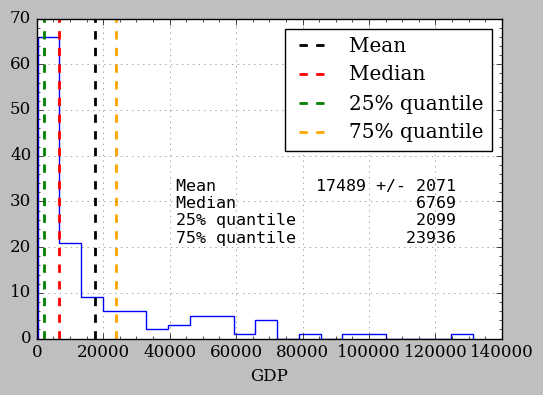

In [196]:
#We a histogram of the GDP with the values
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(GDP, bins=20, histtype='step')
ax.axvline(mean_GDP, color='black', linestyle='--', linewidth = 2, label='Mean')
ax.axvline(median_GDP, color='red', linestyle='--', label='Median', linewidth = 2)
ax.axvline(q25, color='green', linestyle='--', label='25% quantile', linewidth = 2)
ax.axvline(q75, color='orange', linestyle='--', label='75% quantile', linewidth = 2)
ax.set_xlabel('GDP')
ax.legend()
d = {
    'Mean': [mean_GDP, np.std(GDP)/np.sqrt(len(GDP))],
    'Median': median_GDP,
    '25% quantile': q25,
    '75% quantile': q75,
}
text = nice_string_output(d, extra_spacing=2, decimals=0)
add_text_to_ax(0.3, 0.5, text, ax, fontsize=12)

#fig.savefig('figures/421GDP.png')

c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2086: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
c:\Users\Jonathan Krebs\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2087: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


The KS test on log(PopSize) gives a p-value of 0.2545586390732787


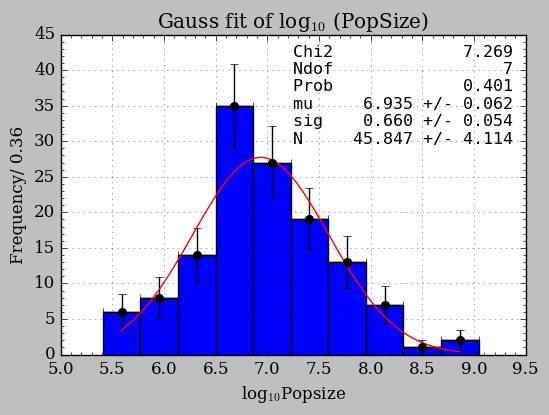

In [182]:
#4.2.2
log_PopSize = np.log10(PopSize.astype(float))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
counts, binedges, bincenters, binwidth = create_histogram(log_PopSize, 10)
ax.hist(log_PopSize, bins=binedges, label='Population Size')
plot_gauss_hist(ax, bincenters, counts, r'Gauss fit of log$_{10}$ (PopSize)', r'log$_{10}$Popsize', [1, 20, 100], text_loc = (0.5, 0.97))
    
#fig.savefig('figures/422logPopSize.png')
#We also perform an KS test on log(PopSize)
print('The KS test on log(PopSize) gives a p-value of', stats.kstest(log_PopSize, 'norm', args=(np.mean(log_PopSize), np.std(log_PopSize)))[1])

The Pearson correlation coefficient is 0.7616945215851152 and the p-value is 2.878749228558367e-26
The Spearman correlation coefficient is 0.8018721850227923 and the p-value is 7.273323121573484e-31


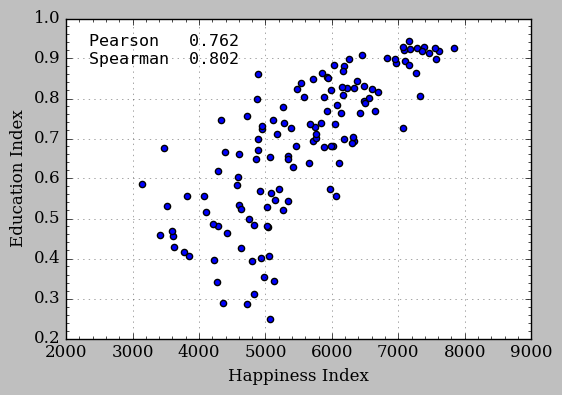

In [183]:

#4.2.3
#scatter plot of happiness and education indeces

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(HappinessI, EducationI)
ax.set_xlabel('Happiness Index')
ax.set_ylabel('Education Index')

#Pearson correlation coefficient
r, p = stats.pearsonr(HappinessI, EducationI)
print('The Pearson correlation coefficient is', r, 'and the p-value is', p)

#Spearman correlation coefficient
rho, p_spear = stats.spearmanr(HappinessI, EducationI)
print('The Spearman correlation coefficient is', rho, 'and the p-value is', p_spear)

d = {
    'Pearson': r,
    'Spearman': rho,
}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.05, 0.95, text, ax, fontsize=12)

#fig.savefig('figures/423Happiness_Education.png')

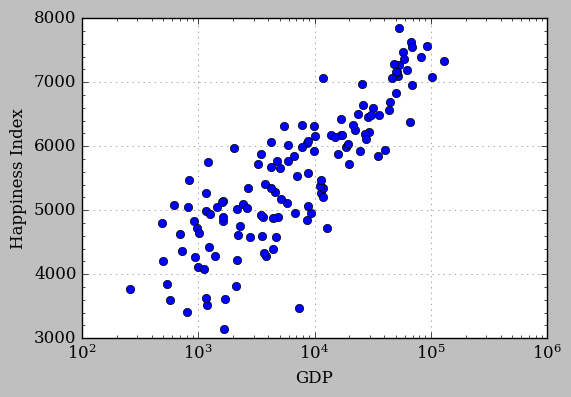

In [184]:
#4.2.4
#We plot happines index as a function of GDP

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(GDP, HappinessI, 'o')
ax.set_xlabel('GDP')
ax.set_ylabel('Happiness Index')
ax.set_xscale('log')


In [185]:
#We fit with a logaritmic function
def log_func(x, a, b):
    return a + b*np.log10(x)

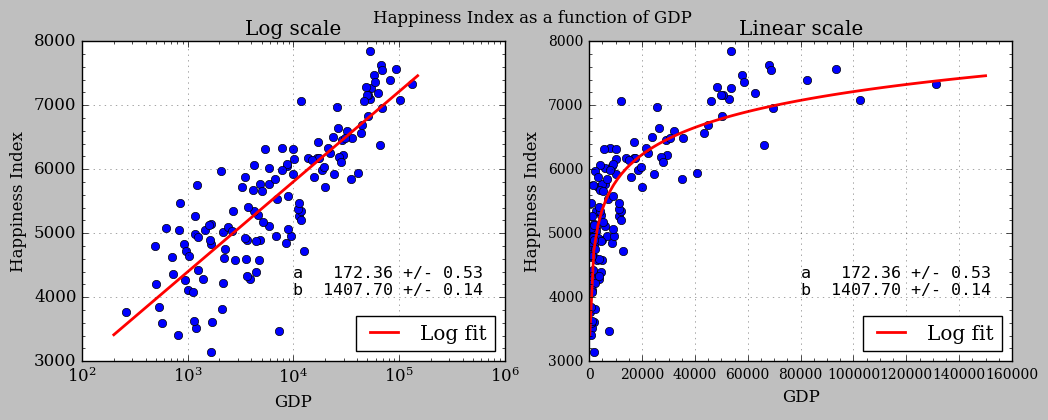

In [193]:
#We fit the data 
chi2_log = Chi2Regression(log_func, GDP.astype(float), HappinessI.astype(float), np.ones(len(HappinessI)))
minuit_log = Minuit(chi2_log, a=0, b=0)
minuit_log.migrad();

#We plot the fit
x = np.linspace(2e2, 1.5e5, 100)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(GDP, HappinessI, 'o', zorder = 0)
ax[0].set_xlabel('GDP')
ax[0].set_ylabel('Happiness Index')
ax[0].set_xscale('log')
ax[0].plot(x, log_func(x, *minuit_log.values), label='Log fit', linewidth = 2, color = 'r', zorder = 1)
ax[0].legend(loc = 'lower right')
ax[0].set_title('Log scale')

ax[1].plot(GDP, HappinessI, 'o', zorder = 0)
ax[1].set_xlabel('GDP')
ax[1].tick_params(labelsize = 10)
ax[1].set_ylabel('Happiness Index')
ax[1].plot(x, log_func(x, *minuit_log.values), label='Log fit', zorder = 1, linewidth = 2, color = 'r')
ax[1].legend(loc = 'lower right');
ax[1].set_title('Linear scale')

d = {
    'a': [minuit_log.values['a'], minuit_log.errors['a']],
    'b': [minuit_log.values['b'], minuit_log.errors['b']]
}
text = nice_string_output(d, extra_spacing=2, decimals= 2)
add_text_to_ax(0.5, 0.3, text, ax[1], fontsize=12)
add_text_to_ax(0.5, 0.3, text, ax[0], fontsize=12)

fig.suptitle('Happiness Index as a function of GDP')
#fig.savefig('figures/424Happiness_GDP.png')


The error that gives a p-value of 0.05 is 525.1256281407035
The error that gives a p-value of 0.95 is 642.7135678391959


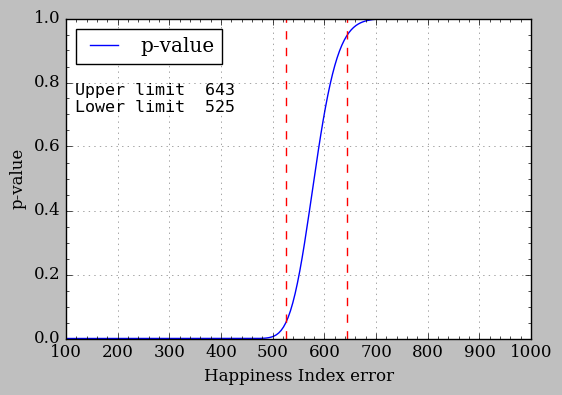

In [187]:
#Using the fit we estimate an uncertainty on the happiness index

Happiness_errs = np.linspace(100, 1000, 200)
ps = []

for err in Happiness_errs:
    chi2 = Chi2Regression(log_func, GDP.astype(float), HappinessI.astype(float), np.ones(len(HappinessI))*err)
    chi2_val = chi2(*minuit_log.values)
    p_val = stats.chi2.sf(chi2_val, len(HappinessI)-2)
    ps.append(p_val)



#We find the error that gives a p-value of 0.05
err = Happiness_errs[np.argmin(np.abs(np.array(ps)-0.05))]
print('The error that gives a p-value of 0.05 is', err)

#likewise we find the error that gives a p-value of 0.95

err_95 = Happiness_errs[np.argmin(np.abs(np.array(ps)-0.95))]
print('The error that gives a p-value of 0.95 is', err_95)

#Plot the pvalues as a function of the error
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(Happiness_errs, ps, label='p-value')
ax.set_xlabel('Happiness Index error')
ax.set_ylabel('p-value')
ax.legend(loc = 'upper left')
ax.axvline(err, color='r', linestyle='--')
ax.axvline(err_95, color='r', linestyle='--')

d = {
    'Upper limit': err_95,
    'Lower limit': err,
}
text = nice_string_output(d, extra_spacing=2, decimals=0)
add_text_to_ax(0.02, 0.8, text, ax, fontsize=12)

#fig.savefig('figures/424Happiness_GDP_pvalue.png')

583.9195979899497


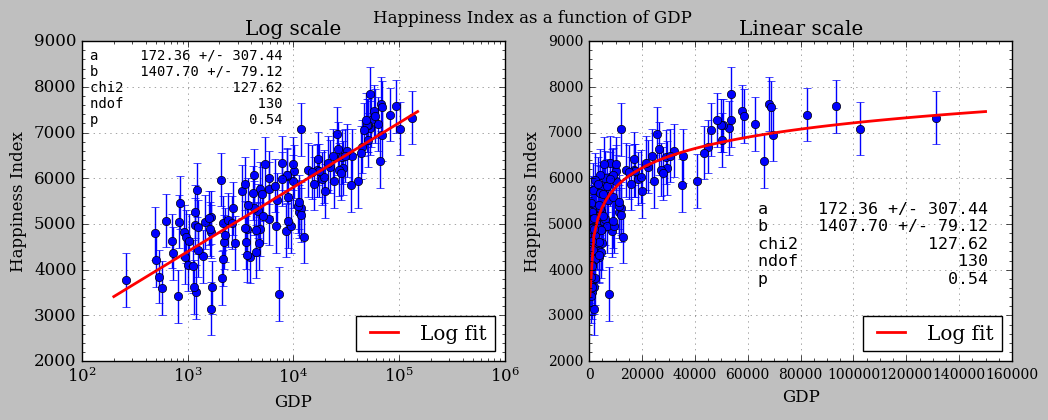

In [197]:
#We fit the data 
test_err = np.ones(len(HappinessI))*(err_95+err)/2
chi2_log = Chi2Regression(log_func, GDP.astype(float), HappinessI.astype(float), test_err)
minuit_log = Minuit(chi2_log, a=0, b=0)
minuit_log.migrad();

#We plot the fit
x = np.linspace(2e2, 1.5e5, 100)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].errorbar(GDP, HappinessI, yerr = test_err, fmt = 'o', zorder = 0)
ax[0].set_xlabel('GDP')
ax[0].set_ylabel('Happiness Index')
ax[0].set_xscale('log')
ax[0].plot(x, log_func(x, *minuit_log.values), label='Log fit', zorder = 1, linewidth = 2, color = 'r')
ax[0].legend(loc = 'lower right')
ax[0].set_title('Log scale')

ax[1].errorbar(GDP, HappinessI, yerr = test_err, fmt = 'o', zorder = 0)
ax[1].set_xlabel('GDP')
ax[1].tick_params(labelsize = 10)
ax[1].set_ylabel('Happiness Index')
ax[1].plot(x, log_func(x, *minuit_log.values), label='Log fit', zorder = 1, linewidth = 2, color = 'r')
ax[1].legend(loc = 'lower right');
ax[1].set_title('Linear scale')

chi2, ndof, p = evaluate_chi2(minuit_log, len(GDP))

d = {
    'a': [minuit_log.values['a'], minuit_log.errors['a']],
    'b': [minuit_log.values['b'], minuit_log.errors['b']],
    'chi2': chi2,
    'ndof': ndof,
    'p': p
}
text = nice_string_output(d, extra_spacing=2, decimals= 2)
add_text_to_ax(0.4, 0.5, text, ax[1], fontsize=12)
add_text_to_ax(0.02, 0.98, text, ax[0], fontsize=10)

fig.suptitle('Happiness Index as a function of GDP')
#fig.savefig('figures/424Happiness_GDP_err.png')
print(test_err[0])